In [20]:
import torch
import matplotlib.pyplot as plt

from torch.optim import Adam


In [50]:
epochs = 200000

theta = torch.tensor(20.0)
theta.requires_grad = True
log_lmbd = torch.tensor(1.0)
log_lmbd.requires_grad = True
optimizer = Adam([theta, log_lmbd], lr=0.05)

threshold = torch.tensor([10])


We want ot minimize theta^2 but with theta >= 10

In [51]:
def f(x):
    return x**2

def g(x):
    return x

In [52]:
def L(x, log_lmbd):
    return (f(x) - log_lmbd.exp() * (g(x) - threshold))

In [55]:
thetas = torch.empty(epochs)
lmbds = torch.empty(epochs)
losses = torch.empty(epochs)

for epoch_idx in range(epochs):
    thetas[epoch_idx] = theta.detach()
    lmbds[epoch_idx] = log_lmbd.detach()

    loss = L(theta, log_lmbd)
    losses[epoch_idx] = loss.detach()
    
    # update parameters
    optimizer.zero_grad()
    loss.backward()
    log_lmbd.grad *= -1
    optimizer.step()



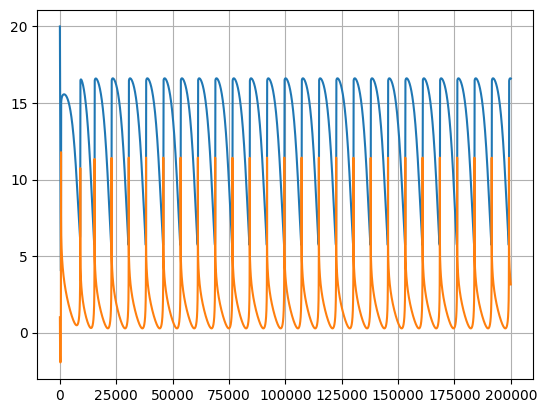

In [56]:
plt.plot(thetas)
plt.plot(lmbds)

# plt.plot(losses)
plt.grid()
# plt.plot(losses)

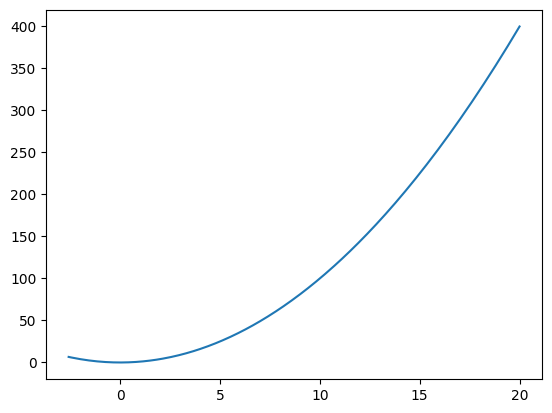

In [36]:
plt.plot(thetas, f(thetas))